In [1]:
import numpy as np
import matplotlib.pyplot as plt

score = np.array([25, 49, 42, 57, 72, 68])
hours = np.array([2, 3, 4, 5, 6, 7,])

## scatter

Text(0.5, 1.0, 'hours VS score')

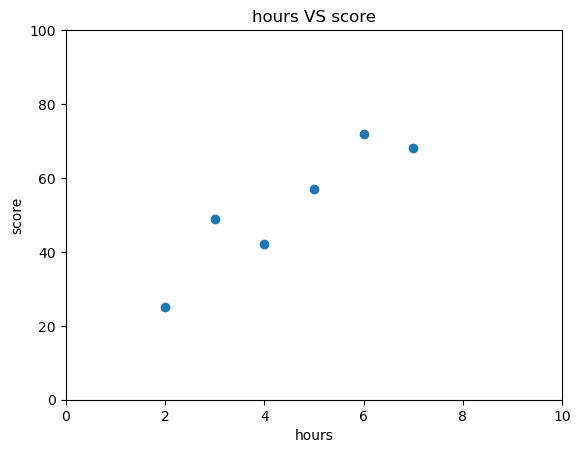

In [65]:
plt.scatter(hours, score) ##scatter(x-axis, y-axis)
plt.xlim(0, 10)
plt.xlabel('hours')

plt.ylim(0, 100)
plt.ylabel('score')
plt.title('hours VS score')

## Linear Regresision

In [7]:
def model(x, w=3, b=35):
    return w*x + b

hours_0to10 = np.linspace(0, 10, 11) ##[0,1,2,3,....10]
h = model(hours_0to10)
print(h)

[35. 38. 41. 44. 47. 50. 53. 56. 59. 62. 65.]


(0.0, 100.0)

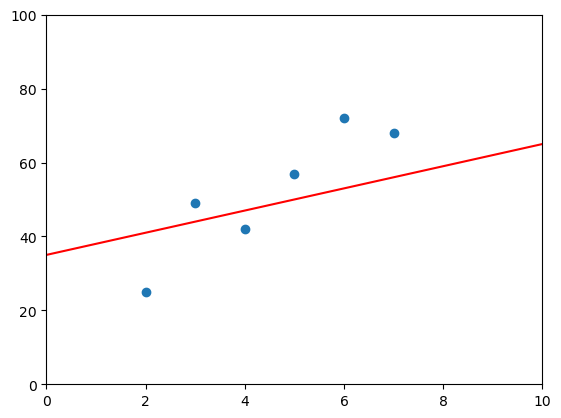

In [8]:
plt.plot(hours_0to10, h, 'r') ## prediction
plt.scatter(hours, score) ## original data
plt.xlim(0,10)
plt.ylim(0,100)

## Fitting Line and Cosd Depending 

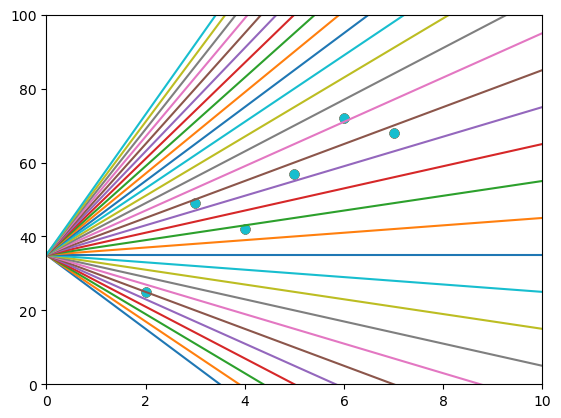

In [9]:
def model(x, w=3, b=35):
    return w*x + b

for i in range(-10, 20, 1):
    h = model(hours_0to10, w=i)
    plt.plot(hours_0to10, h)
    
    plt.scatter(hours, score)
    plt.xlim(0, 10)
    plt.ylim(0, 100)

## Cost Function

In [11]:
def cost(y, y_hat):
    return np.mean((y-y_hat) ** 2)

h = model(hours)
loss = cost(score, h)
print(loss)

143.33333333333334


## Cost VS w value Plot

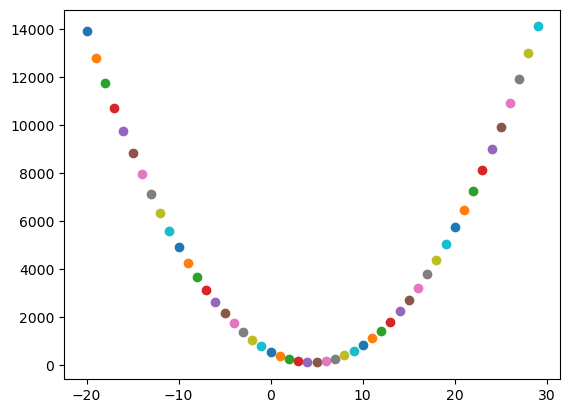

In [13]:
for i in range(-20, 30, 1):
    h = model(hours, w=i)
    loss = cost(score, h)
    plt.scatter(i, loss)

(0.0, 100.0)

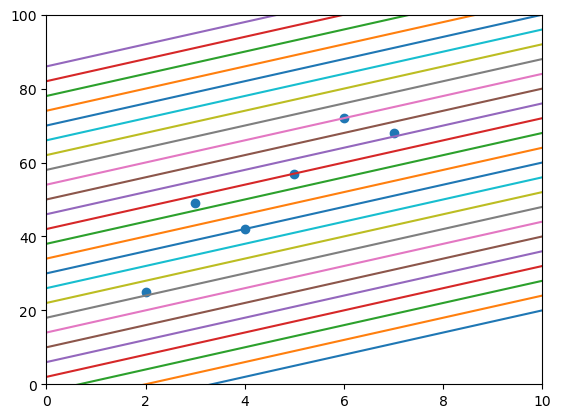

In [14]:
for i in range(-10, 90, 4):
    h = model(hours_0to10, b=i)
    plt.plot(hours_0to10, h)
    
plt.scatter(hours, score)
plt.xlim(0, 10)
plt.ylim(0, 100)

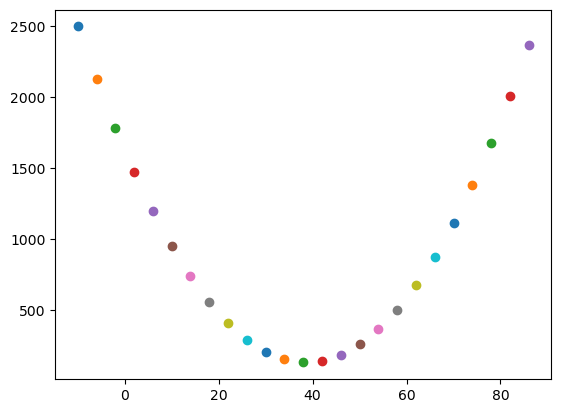

In [15]:
for i in range(-10, 90, 4):
    h = model(hours, b=i)
    loss = cost(score, h)
    plt.scatter(i, loss)

## Gradient Descent and Parameter Updata

In [52]:
w = np.random.uniform() ## 0.0 ~ 1.0 --> sampling
b = np.random.uniform()

w_init = w
b_init = b

print(w)
print(b)

0.9283416228555954
0.6864236712608894


## Hyperparameter Settings

In [55]:
#hyperparameter
lr = 0.001 # alpha value
epochs = 10000


In [56]:
n = hours.shape[0]

loss = []

for i in range(epochs):
    h = model(hours, w=w, b=b)
    
    loss.append(cost(score, h))
    
    dW = (2/n) * sum(hours * (h-score)) ## 2/n x sum(x=hours * (wx+b=h - y=score))
    db = (2/n) * sum(h-score)    ## 2대신 1을 써도 돼서(더 많이 돌리면 됨) np.mean 사용 해도 됨
    
    w = w - lr * dW
    b = b - lr * db
    
    print(loss[-1]) ## 에폭이 잘 돌아가는지 확인(cost가 점점 줄어드는 지 확인 해야 됨)

2446.9361335119015
2222.481981968832
2019.0963556983631
1834.8015788310888
1667.8056174667465
1516.484653693913
1379.3672953647656
1255.1202680786012
1142.5354502410357
1040.518125126039
948.0763357022657
864.3112387085736
788.408364180451
719.6296954338085
657.3064924908188
600.832789161834
549.6595005481155
503.28908366594146
461.270699271276
423.19582783792566
388.6942970583638
357.4306822381027
329.1010445805596
303.4299756450582
280.16791923787275
259.08874469402434
239.98754795209092
222.6786590393821
206.99383659200075
192.78063185305382
179.90090624031453
168.2294880679588
157.65295536015978
148.06853292045255
139.3830929318235
131.51224936922367
124.37953741845094
117.91566992195935
112.05786362117367
106.74922864359769
101.93821529800812
97.5781127982926
93.62659504145795
90.04530902288917
86.79950188655687
83.85768298355542
81.19131765278601
78.77454974606472
76.5839501994534
74.59828920588616
72.7983297736675
71.16664066337715
69.68742688415416
68.34637610108392
67.13051946

(0.0, 300.0)

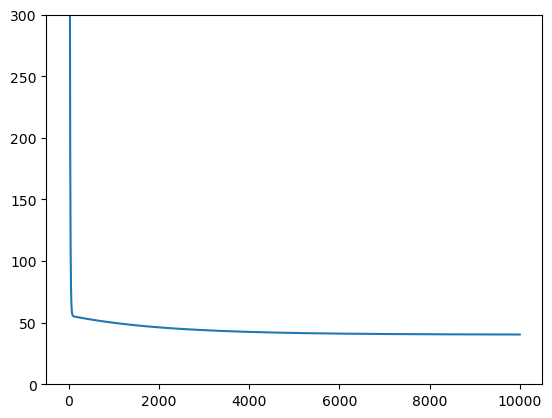

In [57]:
plt.plot(loss)
plt.ylim(0, 300)

## Comparison parameter values

In [58]:
print(f'Before: w: {w_init}, b : {b_init})')
print(f'After: w: {w}, b : {b})')

Before: w: 0.9283416228555954, b : 0.6864236712608894)
After: w: 8.734841580207588, b : 12.740620180606639)


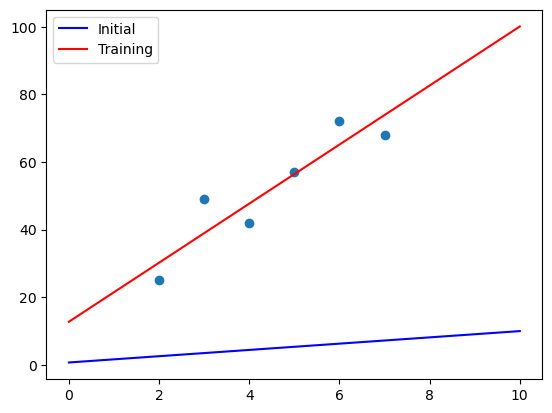

In [60]:
h = model(hours_0to10, w=w, b=b)
h_init = model(hours_0to10, w=w_init, b=b_init)

plt.scatter(hours, score)
plt.plot(hours_0to10, h_init, label = 'Initial', color = 'b')
plt.plot(hours_0to10, h, label = 'Training', color = 'r')
plt.legend()
plt.show()